# PCA - Visualización de Datos con el Dataset Iris

En esta actividad, utilizaremos PCA (Análisis de Componentes Principales) para reducir las dimensiones del famoso dataset Iris y visualizar los datos en un espacio bidimensional.

In [3]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')


## 1. Carga y Exploración del Dataset

In [4]:

# Cargar el dataset
file_path = 'data/Iris.csv'
iris_data = pd.read_csv(file_path)

# Mostrar las primeras filas
print(iris_data.head())

# Información general del dataset
print(iris_data.info())

# Resumen estadístico
print(iris_data.describe())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

## 2. Preprocesamiento de Datos

Realizamos una normalización de las características numéricas, excluyendo la variable de clase `Species`.

In [5]:

# Seleccionar las características y normalizarlas
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris_data[features]
y = iris_data['Species']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar la normalización
pd.DataFrame(X_scaled, columns=features).head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## 3. Aplicación de PCA

Aplicaremos PCA para reducir las dimensiones a 2 componentes principales.

In [6]:

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los 2 componentes principales: {explained_variance.sum():.2f}")


Varianza explicada por los 2 componentes principales: 0.96


## 4. Visualización de los Componentes Principales

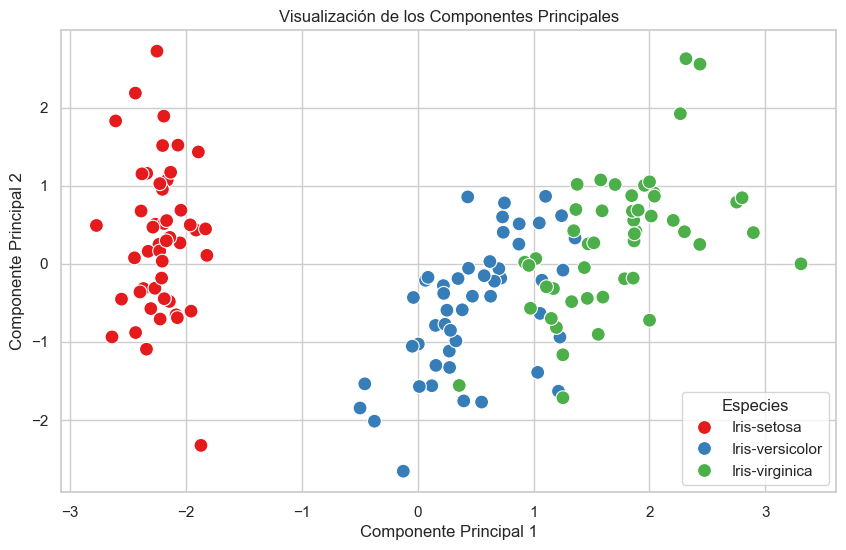

In [7]:

# Visualizar los datos proyectados en el espacio de los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='Set1', s=100)
plt.title('Visualización de los Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especies')
plt.show()


## 5. Interpretación de Resultados

Analizamos los coeficientes de los componentes principales para determinar qué variables tienen mayor influencia en cada componente.

In [8]:

# Coeficientes de los componentes principales
components_df = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components_df)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416


## Conclusión

El PCA ha reducido el dataset Iris a 2 dimensiones, permitiendo visualizar cómo se agrupan las tres clases de flores en el espacio bidimensional de los componentes principales.